Created directory: leaf_images/LBP_Blueberry
Created directory: leaf_images/LBP_Bell_Pepper
Created directory: leaf_images/LBP_Tomato
Processing leaf images...
Processed 20 images...
Processed 40 images...
Processed 60 images...
Processed 80 images...
Processed 100 images...
Processed 120 images...
Processed 140 images...
Processed 160 images...
Processed 180 images...
Processed 200 images...
Processed 220 images...
Processed 240 images...
Processed 260 images...
Processed 280 images...
Processed 300 images...
Processed 320 images...
Processed 340 images...
Processed 360 images...
Processed 380 images...
Processed 400 images...
Processed 420 images...
Processed 440 images...
Processed 460 images...
Processed 480 images...
Processed 500 images...
Processed 520 images...
Processed 540 images...
Processed 560 images...
Processed 580 images...
Processed 600 images...
Processed 620 images...
Processed 640 images...
Processed 660 images...
Processed 680 images...
Processed 700 images...
Proc

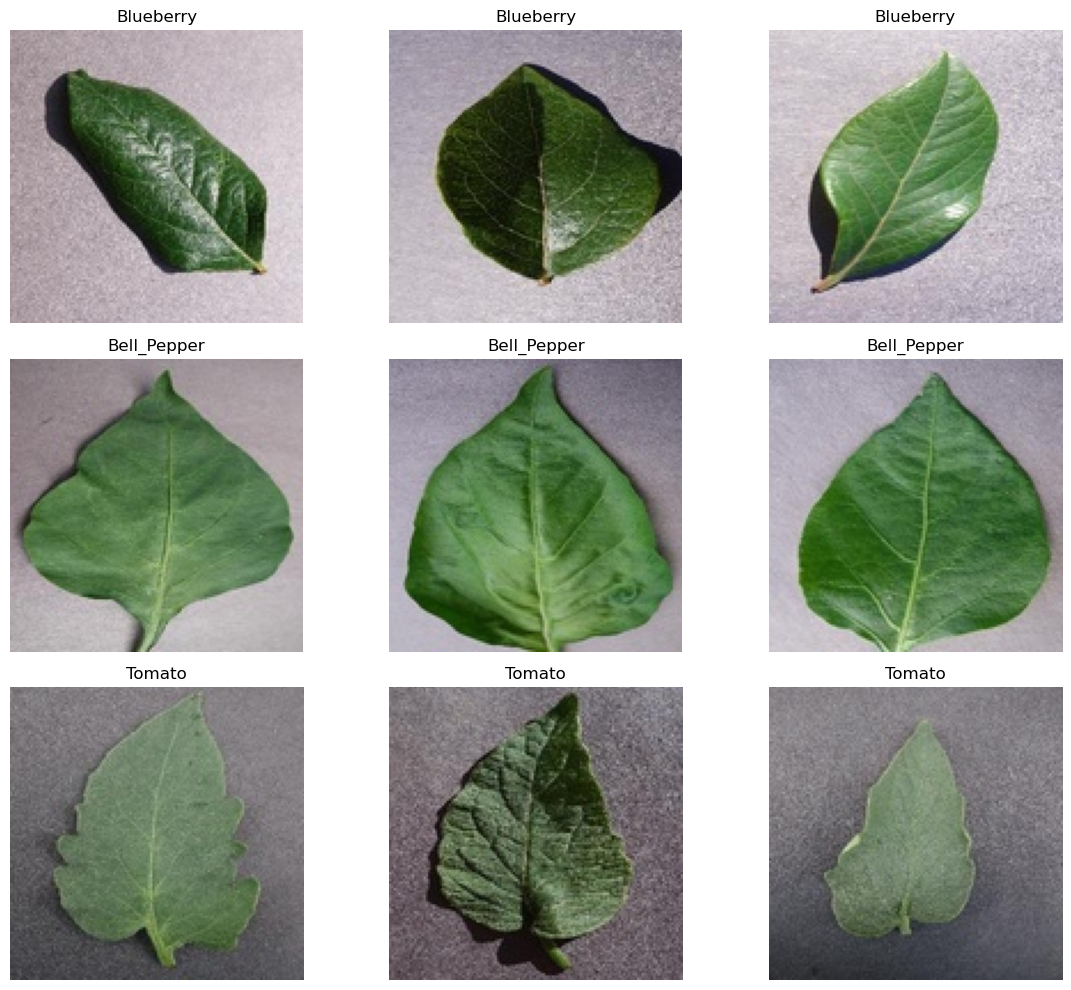


Comparing LBP histograms from each class...


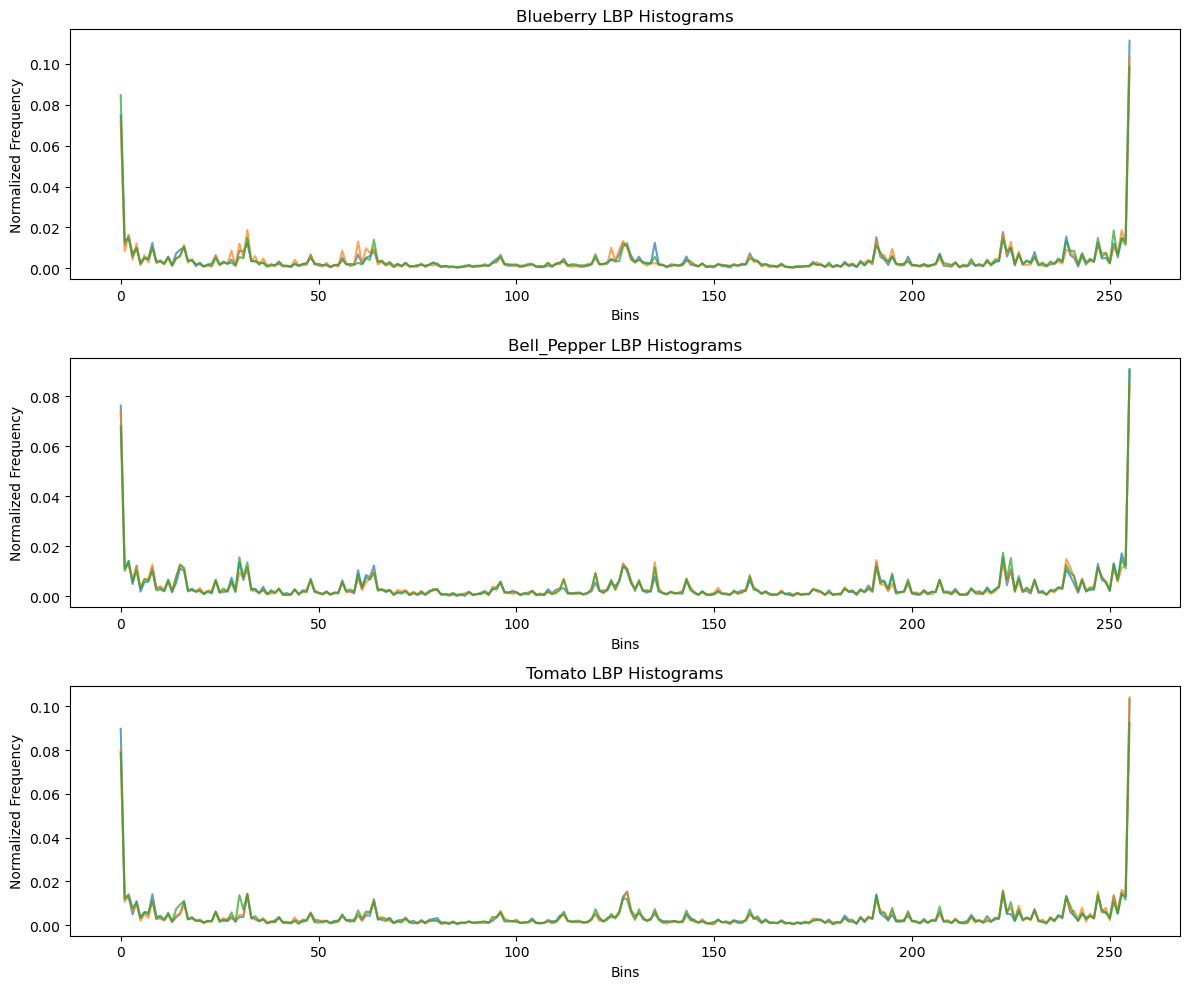


Extracting LBP features and saving filtered images...


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def get_pixel(img, center, x, y):
    """Get pixel value compared to center pixel"""
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    

def calculate_lbp(img_gray):
    """Calculate LBP image and histogram"""
    height, width = img_gray.shape
    
    img_lbp = np.zeros((height, width), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
             img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    
    # Calculate histogram of LBP image
    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
    # Normalize histogram for better comparison
    hist_lbp = hist_lbp.flatten() / sum(hist_lbp.flatten())
    
    return img_lbp, hist_lbp

def extract_features(image_path, save_lbp=False, show_images=False):
    """Extract LBP features from an image and optionally save LBP image"""
    # Read image
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"Failed to read image: {image_path}")
        return None
    
    # Convert to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    # Calculate LBP
    img_lbp, hist_lbp = calculate_lbp(img_gray)
    
    # Save LBP image if requested
    if save_lbp:
        # Create the folder for the LBP image
        # First determine which class this image belongs to
        path_parts = image_path.split(os.sep)
        for folder_name in ["Blueberry", "Bell_Pepper", "Tomato"]:
            if folder_name in path_parts:
                plant_name = folder_name
                break
        else:
            plant_name = "Unknown"
        
        # Create LBP folder if it doesn't exist
        base_dir = "leaf_images"
        lbp_folder = os.path.join(base_dir, f"LBP_{plant_name}")
        os.makedirs(lbp_folder, exist_ok=True)
        
        # Get original filename
        original_filename = os.path.basename(image_path)
        lbp_filename = f"lbp_{original_filename}"
        lbp_path = os.path.join(lbp_folder, lbp_filename)
        
        # Save LBP image
        cv2.imwrite(lbp_path, img_lbp)
    
    # Optionally show images
    if show_images:
        output_list = []
        output_list.append({
            "img": img_gray,
            "xlabel": "",
            "ylabel": "",
            "xtick": [],
            "ytick": [],
            "title": "Gray Image",
            "type": "gray"        
        })
        output_list.append({
            "img": img_lbp,
            "xlabel": "",
            "ylabel": "",
            "xtick": [],
            "ytick": [],
            "title": "LBP Image",
            "type": "gray"
        })    
        output_list.append({
            "img": hist_lbp,
            "xlabel": "Bins",
            "ylabel": "Number of pixels",
            "xtick": None,
            "ytick": None,
            "title": "Histogram(LBP)",
            "type": "histogram"
        })
        show_output(output_list)
    
    return hist_lbp

def show_output(output_list):
    """Display images and histograms"""
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(12, 4))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list, rotation = 90)
    plt.tight_layout()
    plt.show()

def plot_sample_images(data, labels, folder_names, num_samples=3):
    """Plot sample images from each folder"""
    num_classes = len(folder_names)
    fig, axs = plt.subplots(num_classes, num_samples, figsize=(12, 10))
    
    for i, folder in enumerate(folder_names):
        # Get indices of images from this class
        indices = [idx for idx, label in enumerate(labels) if label == i]
        
        # Select random samples
        selected_indices = np.random.choice(indices, min(num_samples, len(indices)), replace=False)
        
        for j, idx in enumerate(selected_indices):
            # Get the image path
            img_path = data[idx]
            
            # Load and display the image
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            axs[i, j].imshow(img)
            axs[i, j].set_title(f"{folder}")
            axs[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

def compare_histograms(data, labels, folder_names, num_samples=3):
    """Compare LBP histograms from different classes"""
    num_classes = len(folder_names)
    fig, axs = plt.subplots(num_classes, 1, figsize=(12, 10))
    
    for i, folder in enumerate(folder_names):
        # Get indices of images from this class
        indices = [idx for idx, label in enumerate(labels) if label == i]
        
        # Select random samples
        selected_indices = np.random.choice(indices, min(num_samples, len(indices)), replace=False)
        
        # Plot histograms
        for idx in selected_indices:
            # Get the image path
            img_path = data[idx]
            
            # Calculate LBP histogram
            img_bgr = cv2.imread(img_path)
            img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
            _, hist_lbp = calculate_lbp(img_gray)
            
            # Plot histogram
            axs[i].plot(hist_lbp, alpha=0.7)
            
        axs[i].set_title(f"{folder} LBP Histograms")
        axs[i].set_xlabel("Bins")
        axs[i].set_ylabel("Normalized Frequency")
    
    plt.tight_layout()
    plt.show()

def main():
    # Define directories containing leaf images
    base_dir = "leaf_images"  
    images_dir = os.path.join(base_dir, "images")  # Added images subdirectory
    folder_names = ["Blueberry", "Bell_Pepper", "Tomato"]
    
    # Create LBP directories if they don't exist
    for folder_name in folder_names:
        lbp_folder = os.path.join(base_dir, f"LBP_{folder_name}")
        os.makedirs(lbp_folder, exist_ok=True)
        print(f"Created directory: {lbp_folder}")
    
    # Lists to store image paths and labels
    all_image_paths = []
    all_labels = []
    
    # Count processed images
    processed = 0
    
    # Process each directory
    print("Processing leaf images...")
    for i, folder_name in enumerate(folder_names):
        folder_path = os.path.join(images_dir, folder_name)
        if not os.path.exists(folder_path):
            print(f"Warning: Folder {folder_path} does not exist!")
            continue
            
        # Get all image files in the folder
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            all_image_paths.append(image_path)
            all_labels.append(i)  # Use folder index as label
            processed += 1
            
            # Show progress
            if processed % 20 == 0:
                print(f"Processed {processed} images...")
    
    print(f"Found {processed} images in total.")
    
    # Show sample images from each class
    print("\nShowing sample images from each class...")
    plot_sample_images(all_image_paths, all_labels, folder_names)
    
    # Compare LBP histograms from each class
    print("\nComparing LBP histograms from each class...")
    compare_histograms(all_image_paths, all_labels, folder_names)
    
    # Extract features for all images and save LBP images
    print("\nExtracting LBP features and saving filtered images...")
    features = []
    for img_path in all_image_paths:
        hist = extract_features(img_path, save_lbp=True)
        if hist is not None:
            features.append(hist)
        else:
            print(f"Skipping invalid image: {img_path}")
    
    if len(features) != len(all_labels):
        print("Warning: Number of features doesn't match number of labels!")
        # Adjust labels to match features
        all_labels = all_labels[:len(features)]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, all_labels, test_size=0.3, random_state=42, stratify=all_labels
    )
    
    # Train a classifier
    print("\nTraining SVM classifier...")
    classifier = SVC(kernel='linear', probability=True)
    classifier.fit(X_train, y_train)
    
    # Test the classifier
    print("\nEvaluating classifier...")
    y_pred = classifier.predict(X_test)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=folder_names))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(folder_names))
    plt.xticks(tick_marks, folder_names, rotation=45)
    plt.yticks(tick_marks, folder_names)
    
    # Add text annotations to the confusion matrix
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print("Leaf classification using LBP features completed!")

if __name__ == '__main__':
    main()
